In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from systole.detection import ppg_peaks, interpolate_clipping, ecg_peaks
from systole.plots import plot_rr, plot_evoked
from systole import import_dataset1, import_ppg
from systole.utils import heart_rate, to_epochs, input_conversion
from systole.hrv import frequency_domain

from IPython.display import Image
from IPython.core.display import HTML

from bokeh.io import output_notebook
from bokeh.plotting import show
output_notebook()

sns.set_context('talk')

Loading BokehJS ...

In [3]:
# Import ECg recording
ecg_df = import_dataset1(modalities=['ECG', 'Stim'])
signal, peaks = ecg_peaks(ecg_df.ecg, method='pan-tompkins', sfreq=1000, find_local=True)

## Instantaneous heart rate

In [4]:
show(
    plot_rr(peaks, input_type='peaks', backend='bokeh', figsize=400)
)

## Evoked heart rate

Finding R peaks and extract instantaneous heart rate.

In [5]:
signal, peaks = ecg_peaks(ecg_df.ecg, method='pan-tompkins', sfreq=1000, find_local=True)
heartrate, new_time = heart_rate(peaks, kind='previous', unit='bpm')

Create stim vectors for neutral and discusting images separately. Here, 1 encode the presentation of an image.

In [6]:
neutral, disgust = np.zeros(len(new_time)), np.zeros(len(new_time))

disgust[np.round(np.where(ecg_df.stim.to_numpy() == 2)[0]).astype(int)] = 1
neutral[np.round(np.where(ecg_df.stim.to_numpy() == 1)[0]).astype(int)] = 1

Event related plot.

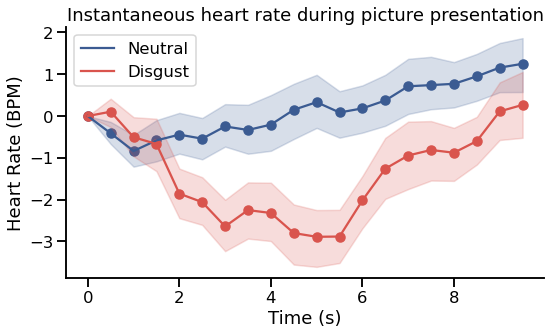

In [7]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 5))
for cond, data, col in zip(
        ['Neutral', 'Disgust'], [neutral, disgust],
        [sns.xkcd_rgb["denim blue"], sns.xkcd_rgb["pale red"]]):

    # Epoch intantaneous heart rate
    # and downsample to 2 Hz to save memory
    epochs = to_epochs(heartrate, data, tmin=0, tmax=10)[:, ::500]

    # Plot
    df = pd.DataFrame(epochs).melt()
    df.variable /= 2
    sns.lineplot(data=df, x='variable', y='value', ci=68, label=cond,
                 color=col, ax=ax, markers=['--', '-o'])

    plt.scatter(np.arange(0, 10, .5), epochs.mean(0), color=col)

#ax.set_xlim(0, 10)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Heart Rate (BPM)')
ax.set_title('Instantaneous heart rate during picture presentation')
sns.despine()
plt.tight_layout()